<h4> Importing libraries </h4>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

## 1 . EXPLORATORY DATA ANALYSIS
###                    Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

 <b>Client:</b> Rick the Investor (Risk averse)<br>
 <b>Available data:</b> Extracted 800,000 data records from kaggle dataset with complete loan data issued through the 2007-2015

<h3>1.1 Reading lending club data</h3>


In [3]:
dataset = pd.read_csv('../Data/loan.csv',low_memory=False)

In [4]:
data_dictionary =pd.read_excel('../Data/LCDataDictionary.xlsx')

In [5]:
dataset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

<h3>1.2 Understanding the data (categorical and numerical) </h3>

In [12]:
datatypes=dataset.dtypes.value_counts()

In [13]:
datatypes_list = datatypes.index.tolist()

In [14]:
datatypesdf=pd.DataFrame()
datatypesdf["datatype"]=datatypes_list
datatypesdf["total"]=[datatypes[0],datatypes[1],datatypes[2]]

In [15]:
datatypesdf

,datatype,total
0,float64,49
1,object,23
2,int64,2


<h4>Given dataset have total 53 numerical features and 24 non-numeric

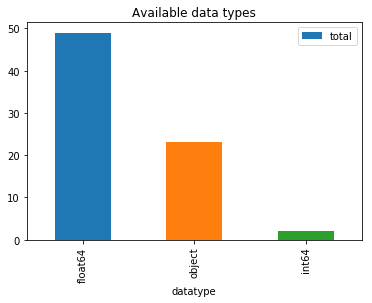

In [16]:
datatypesdf.plot(x="datatype",y="total", kind='bar',title="Available data types")

<h3> 1.3 Missing Value Analysis</h3>

In [17]:
#dataset['desc']
dataset.isna().sum()
columns_with_most_nulls = []
columns_with_data=[]
for key,null_value in (dataset.isnull().sum()/len(dataset)*100).sort_values().iteritems():
    if null_value > 50:
        columns_with_most_nulls.append([key,null_value])
    else:
        columns_with_data.append([key,null_value])
print("No of columns with more than 50% missing data: ",len(columns_with_most_nulls))
print("No of columns with considerable amount of data: ",len(columns_with_data))

No of columns with more than 50% missing data:  21
No of columns with considerable amount of data:  53


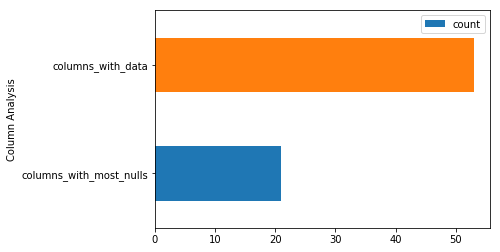

In [18]:
missingdataanalysis_df=pd.DataFrame({"Column Analysis":["columns_with_most_nulls","columns_with_data"],"count":[21,53]})
missingdataanalysis_df.plot.barh(x='Column Analysis',y="count")

<h3> 1.4 Statistical Analysis</h3>

In [19]:
set(dataset['loan_status'])

{'Charged Off',
 'Current',
 'Default',
 'Does not meet the credit policy. Status:Charged Off',
 'Does not meet the credit policy. Status:Fully Paid',
 'Fully Paid',
 'In Grace Period',
 'Issued',
 'Late (16-30 days)',
 'Late (31-120 days)'}

In [20]:
loan_status = dataset['loan_status'].value_counts()

dataset['addr_state'].value_counts().plot.bar(title = 'Loan Counts by USA states')

In [72]:
data = []
names=[]
for name in set(dataset.loc[:,"addr_state"]):
    data.append(dataset[dataset["addr_state"]==name]["int_rate"])
    names.append(name)

# layout = go.Layout(title = 'Interested Rate based on Loan Status',
#                   xaxis = dict(title = 'State'),
#                   yaxis = dict(title = 'Interest Rate'))
# fig = dict(data = data, layout = layout)
# py.iplot(fig)


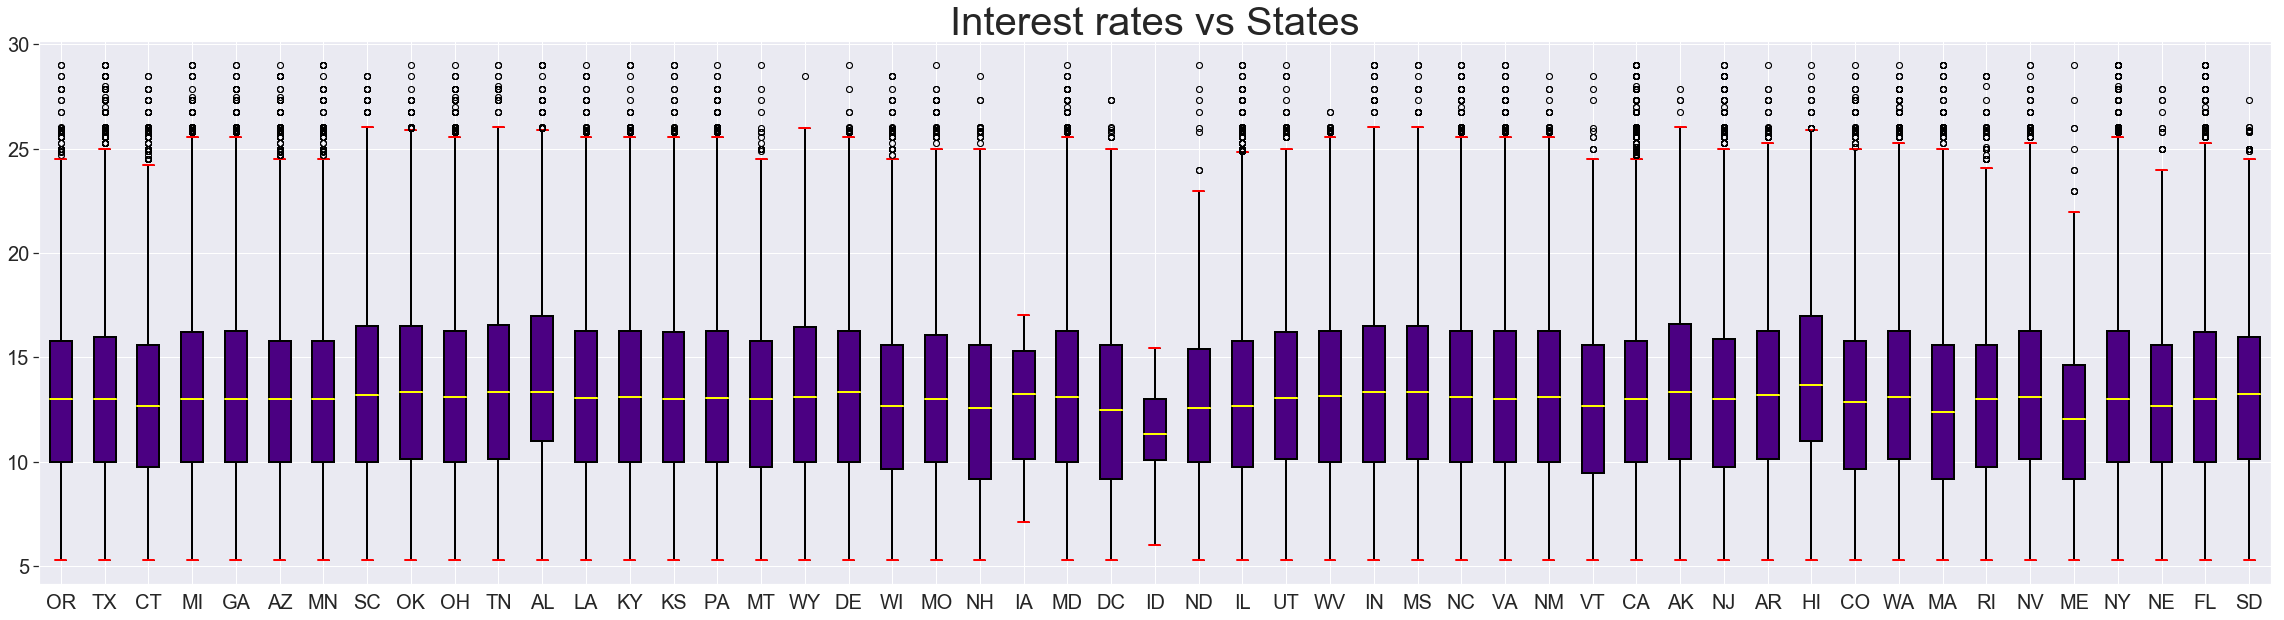

In [120]:
# Create a figure instance
fig = plt.figure(1, figsize=(40, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data)
bp = ax.boxplot(data, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
   # change outline color
   box.set( color='Black', linewidth=2)
   # change fill color
   box.set( facecolor = 'Indigo' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
   whisker.set(color='Black', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
   cap.set(color='Red', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
   median.set(color='Yellow', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
   flier.set(marker='o', color='Green', alpha=0.5)
ax.set_xticklabels(names,fontsize=20)
ax.set_yticklabels(np.arange(0,31,5),fontsize=20)
ax.set_title("Interest rates vs States",fontsize=40)
ax.get_yaxis().tick_left()

In [93]:
print(names)

['OR', 'TX', 'CT', 'MI', 'GA', 'AZ', 'MN', 'SC', 'OK', 'OH', 'TN', 'AL', 'LA', 'KY', 'KS', 'PA', 'MT', 'WY', 'DE', 'WI', 'MO', 'NH', 'IA', 'MD', 'DC', 'ID', 'ND', 'IL', 'UT', 'WV', 'IN', 'MS', 'NC', 'VA', 'NM', 'VT', 'CA', 'AK', 'NJ', 'AR', 'HI', 'CO', 'WA', 'MA', 'RI', 'NV', 'ME', 'NY', 'NE', 'FL', 'SD']


In [122]:
status_data = []
stat_names=[]
for name in set(dataset.loc[:,"loan_status"]):
    status_data.append(dataset[dataset["loan_status"]==name]["int_rate"])
    stat_names.append(name)


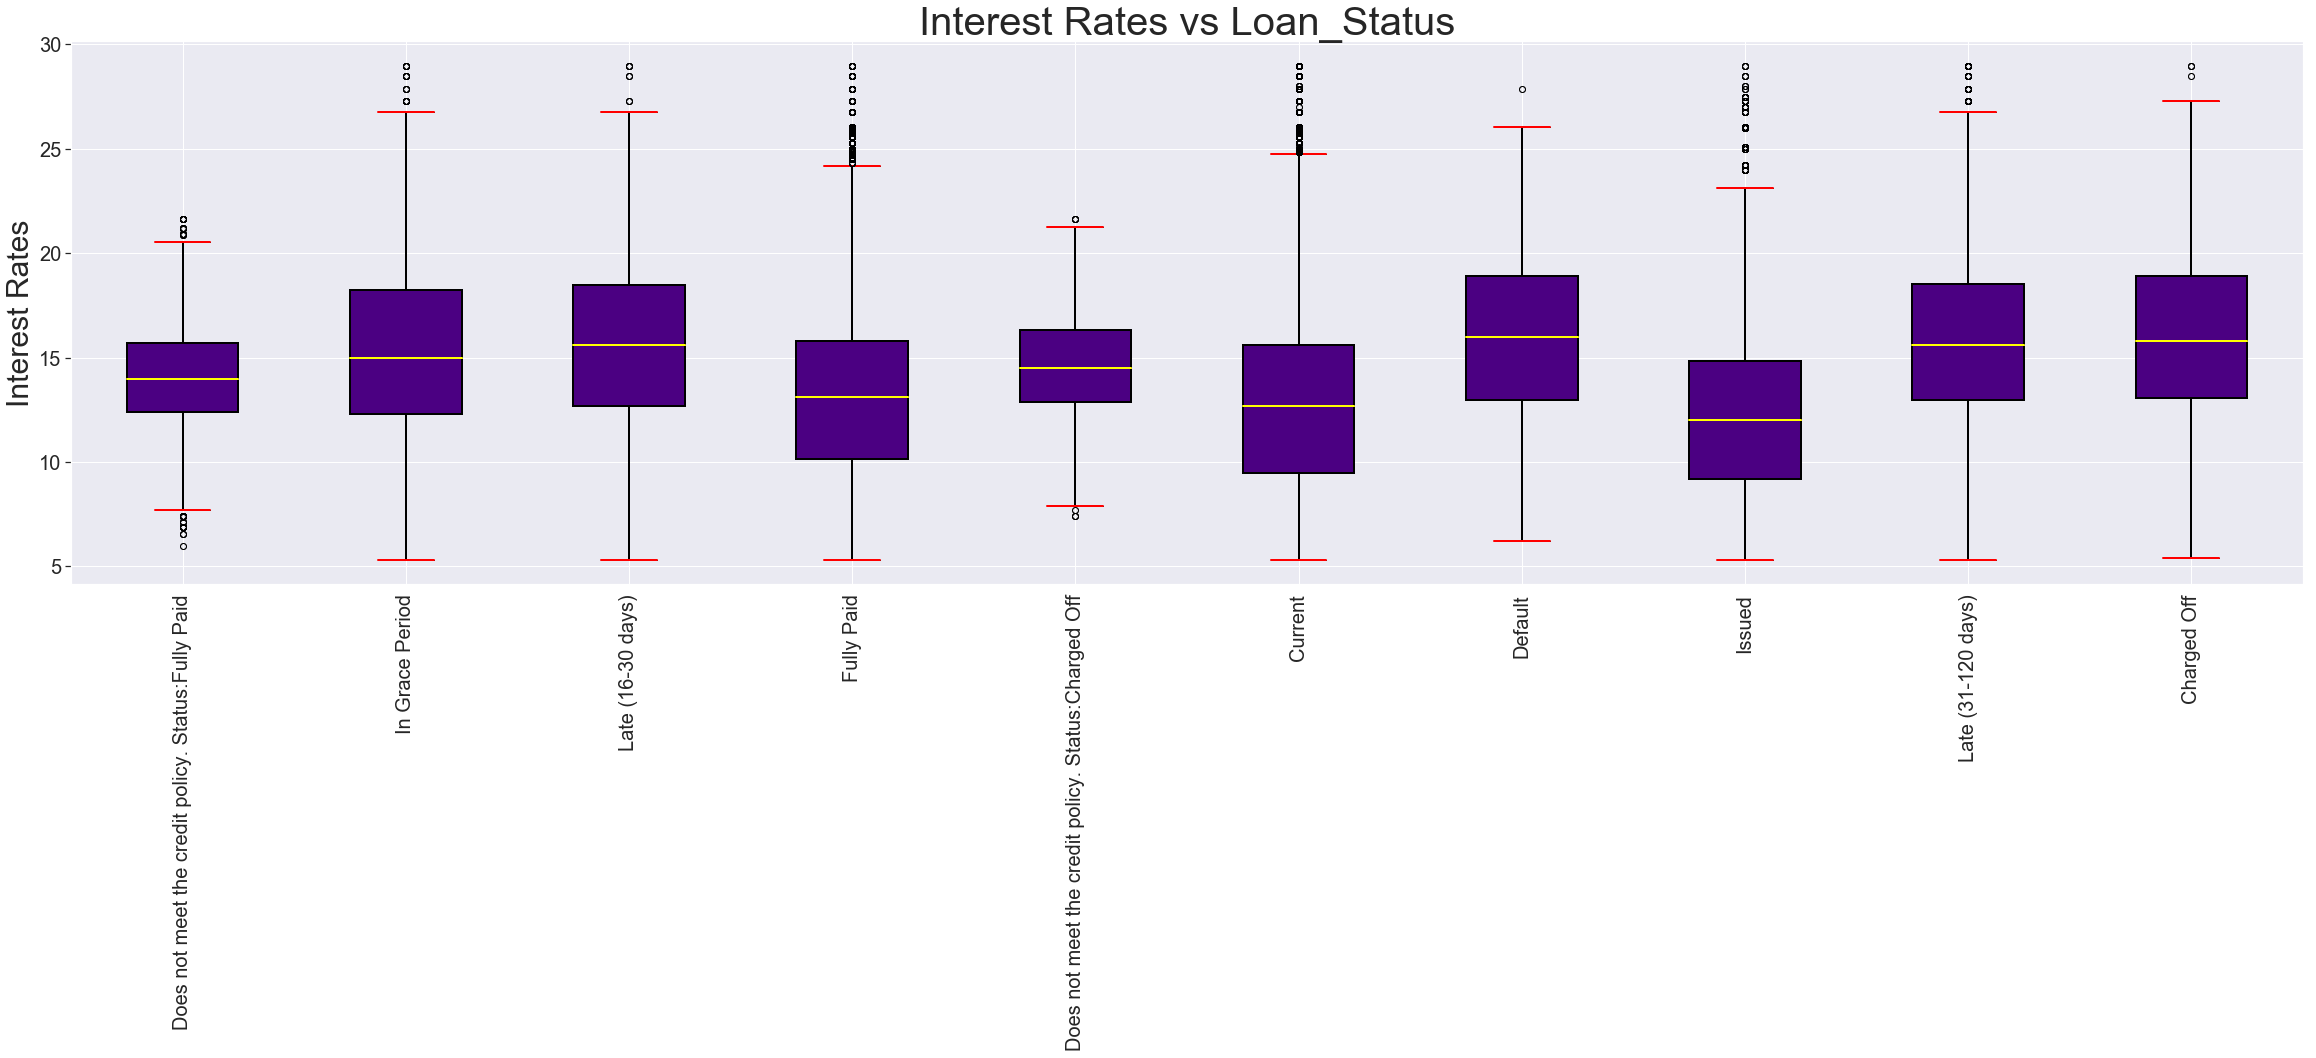

In [141]:
# Create a figure instance
fig = plt.figure(1, figsize=(40, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(status_data)
bp = ax.boxplot(status_data, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
   # change outline color
   box.set( color='Black', linewidth=2)
   # change fill color
   box.set( facecolor = 'Indigo' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
   whisker.set(color='Black', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
   cap.set(color='Red', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
   median.set(color='Yellow', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
   flier.set(marker='o', color='Green', alpha=0.5)
ax.set_xticklabels(stat_names,rotation=90,fontsize=20)
ax.set_yticklabels(np.arange(0,31,5),fontsize=20)
ax.set_title("Interest Rates vs Loan_Status",fontsize=40)
ax.set_ylabel("Interest Rates",rotation=90,fontsize=30)
ax.get_yaxis().tick_left()

In [60]:
completed_loans = dataset.loc[dataset["loan_status"].isin(["Fully Paid","Charged Off"]),:]
completed_loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1070078,1305201,6500.0,6500.0,6500.000000,60 months,14.65,153.45,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1069908,1305008,12000.0,12000.0,12000.000000,36 months,12.69,402.54,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
index = loan_status.index.tolist()
value = loan_status.tolist()

In [159]:
loan_statusdf = pd.DataFrame()
loan_statusdf['name'] = index
loan_statusdf['value'] = value


In [160]:
loan_statusdf

,name,value
0,Current,601779
1,Fully Paid,207723
2,Charged Off,45248
3,Late (31-120 days),11591
4,Issued,8460
5,In Grace Period,6253
6,Late (16-30 days),2357
7,Does not meet the credit policy. Status:Fully ...,1988
8,Default,1219
9,Does not meet the credit policy. Status:Charge...,761


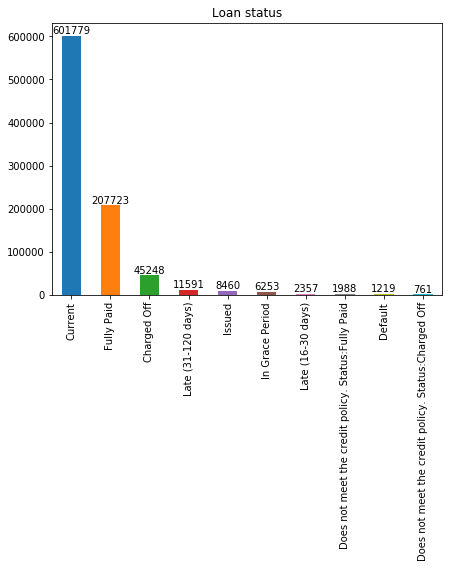

In [118]:
# Plot the figure.
plt.figure(figsize=(7, 5))
ax = loan_status.plot(kind='bar')
ax.set_title('Loan status')
#ax.set_xlabel('value ($)')
#ax.set_ylabel('index ($)')
#ax.set_yticklabels(value)

rects = ax.patches

# Make some labels.
labels = [i for i in (loan_statusdf['value'].tolist())]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

In [144]:
issue_dates=dataset['issue_d']

In [145]:
year = []
for i in issue_dates:
    year.append(i[4:])


In [146]:
dataset['year'] = year
dataset['sum'] =1
dataset['count'] =1

In [212]:
year = dataset.groupby(by=["year"])['int_rate'].mean().index.values.tolist()
int_rate_avg_year = dataset.groupby(by=["year"])['int_rate'].mean().tolist()

In [213]:
int_rate_avg_year

[11.825107794361525,
 12.061964061847076,
 12.437246733573073,
 11.98526760788084,
 12.223746144283156,
 13.63767590458777,
 14.531745092954862,
 13.771244970901517,
 12.601731038706498]

Text(0.5, 1.0, 'Year vs Average Intrest rate')

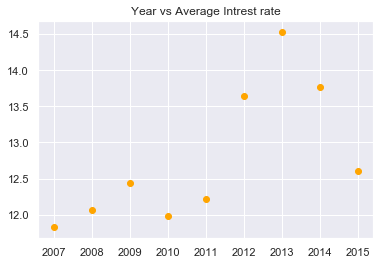

In [211]:
plt.scatter(year, int_rate_avg_year, color = 'Orange')
plt.grid
plt.title('Year vs Average Intrest rate')


In [ ]:
dataset.groupby(by=["year"])['int_rate'].mean().sort_values().plot(kind='line',title='Interest rate by year',figsize=(20,10),xticks=['2007', '2010', '2008', '2011', '2009', '2015', '2012', '2014','2013'])

In [166]:
dataset.groupby(by=["year"]).loan_status.value_counts().to_csv('byyear.csv')

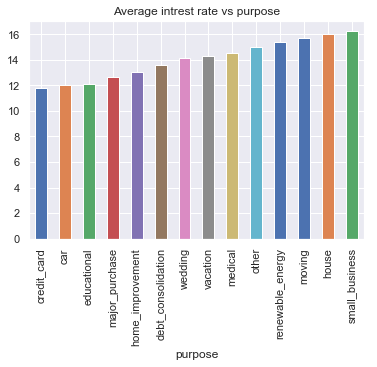

In [222]:
dataset.groupby(by=["purpose"]).mean()["int_rate"].sort_values().plot.bar(title = 'Average intrest rate vs purpose')

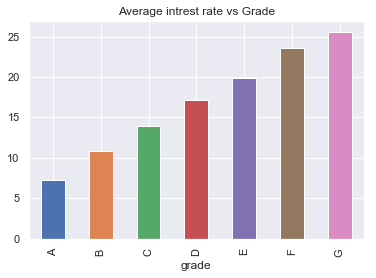

In [227]:
dataset.groupby(by=["grade"]).mean()["int_rate"].sort_values().plot.bar(title = 'Average intrest rate vs Grade')


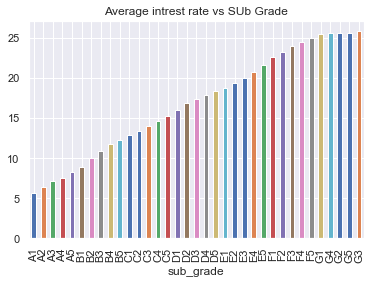

In [230]:
dataset.groupby(by=["sub_grade"]).mean()["int_rate"].sort_values().plot.bar(title = 'Average intrest rate vs SUb Grade')

<b>INSIGHTS THAT COULD HELP MY CLIENT TAKE LESS RISK AND GAIN PROFIT:</b> <br> 
- Since the grade A, B, C investment are considered as safe investment. Since shown in the above graph that the borrowers in these grades have significantly increased for both 36 month and 60 month term which could be a positive sign for Rick <br>
- Rick should not invest his money with borrowers who are taking loans for small business, moving and house. He should prefer people borrowing for credit card, car and educational loan. Rick should rely on loan grades on these loan purpose<br>
- Rick should be optimistic that the amount of money invested in lending club has increased over the years and which could draw a meaning that people take lending club as a positive way of investment<br>
- The interest rate from the year 2010 – 2018 has been pretty constant for Grade A, B, C and D while it has significantly increased in the previous years for Grade E, F and G. This conveys that borrowers with Grade A, B, C and D could be considered as safe investment while in the other grades its risky to invest<br>
- Rick should diversify his investment as greater diversification with spreading your investment equally across many Notes corresponding to many different Borrowers can reduce the volatility of returns <br>
- Rick should have an account with more than 100 Notes of only grades A through E (no F or G grade Notes) as they are likely to see positive returns